# TUGAS PRAKTIKUM 2

Estimated number of clusters: 2
Estimated number of noise points: 0

DBSCAN Evaluation Metrics:
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


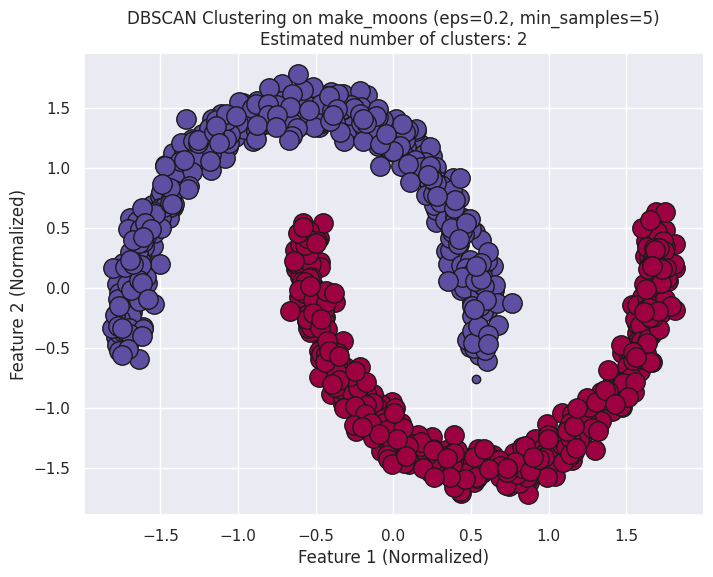

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
X_moons, y_moons_true = make_moons(n_samples=1000, noise=0.05, random_state=0)
X_moons = StandardScaler().fit_transform(X_moons)

# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
dbscan_moons = DBSCAN(eps=0.2, min_samples=5).fit(X_moons)
labels_moons = dbscan_moons.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_moons = len(set(labels_moons)) - (1 if -1 in labels_moons else 0)
n_noise_moons = list(labels_moons).count(-1)

print(f"Estimated number of clusters: {n_clusters_moons}")
print(f"Estimated number of noise points: {n_noise_moons}")

# 3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
print("\nDBSCAN Evaluation Metrics:")
print(f"Homogeneity: {metrics.homogeneity_score(y_moons_true, labels_moons):.3f}")
print(f"Completeness: {metrics.completeness_score(y_moons_true, labels_moons):.3f}")
print(f"V-measure: {metrics.v_measure_score(y_moons_true, labels_moons):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y_moons_true, labels_moons):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(y_moons_true, labels_moons):.3f}"
)
# Silhouette Coefficient is not defined for a single cluster or when all points are noise
if n_clusters_moons > 1 and n_noise_moons < len(X_moons):
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X_moons, labels_moons):.3f}")
else:
    print("Silhouette Coefficient: Not applicable (single cluster or all noise)")


# 4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
unique_labels_moons = set(labels_moons)
core_samples_mask_moons = np.zeros_like(labels_moons, dtype=bool)
core_samples_mask_moons[dbscan_moons.core_sample_indices_] = True

colors_moons = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels_moons))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels_moons, colors_moons):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels_moons == k

    xy = X_moons[class_member_mask & core_samples_mask_moons]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_moons[class_member_mask & ~core_samples_mask_moons]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"DBSCAN Clustering on make_moons (eps={0.2}, min_samples={5})\nEstimated number of clusters: {n_clusters_moons}")
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.show()